# Машинное обучение

# Тема 4. Снижение размерности

* [1. PCA](#chapter1)
    * [Пример 1.1. Оценка кандидатов](#section_1_1)
    * [Пример 1.2. Данные о сотрудниках](#section_1_2)
    * [Пример 1.3. Страхи студентов](#section_1_3)
* [2. t-SNE](#chapter2)
    * [Пример 2.1. Оценка кандидатов](#section_2_1)
    * [Пример 2.2. Данные о сотрудниках](#section_2_2)
    * [Пример 2.3. Страхи студентов](#section_2_3)

In [1]:
#pip install factor_analyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from factor_analyzer import Rotator
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

## PCA (Метод главных компонент)<a id="chapter1"></a>

### Пример 1.1. Оценка кандидатов<a id="section_1_1"></a>

Описание переменных:

- nr  - Идентификатор кандидата 
- name - Имя кандидата
- t1 - Память на числа
- t2 - Математические навыки
- t3 - Готовность к прямому диалогу
- t4 - Умение разрабатывать алгоритмы
- t5 - Уверенность в речи
- t6 - Командный дух
- t7 - Находчивость
- t8 - Навыки сотрудничества
- t9 - Признание со стороны окружающих
- t10 - Умение убеждать

In [2]:
df1 = pd.read_excel('assess.xlsx', index_col=0)
df1

,name,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
nr,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9
2,Sigrid K,10,10,4,10,5,5,4,5,4,3
3,Elmar M,5,4,10,5,10,4,10,5,3,10
4,Peter B,10,10,9,10,10,10,9,10,10,9
5,Otto R,4,3,5,4,3,10,4,10,10,5
6,Elke M,10,10,4,10,5,4,3,4,5,5
7,Sarah K,4,4,5,5,4,10,5,10,10,6
8,Peter T,4,5,3,4,5,10,4,10,10,4
9,Gudrun M,4,5,10,4,10,5,10,4,3,10


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1 to 18
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    18 non-null     object
 1   t1      18 non-null     int64 
 2   t2      18 non-null     int64 
 3   t3      18 non-null     int64 
 4   t4      18 non-null     int64 
 5   t5      18 non-null     int64 
 6   t6      18 non-null     int64 
 7   t7      18 non-null     int64 
 8   t8      18 non-null     int64 
 9   t9      18 non-null     int64 
 10  t10     18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [4]:
rho = df1.corr()
pval = df1.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
t1,1.0***,0.97***,-0.14,0.95***,-0.01,0.02,-0.18,0.07,0.09,-0.17
t2,0.97***,1.0***,-0.04,0.96***,0.11,-0.08,-0.08,-0.05,0.0,-0.08
t3,-0.14,-0.04,1.0***,-0.02,0.94***,-0.26,0.98***,-0.26,-0.26,0.97***
t4,0.95***,0.96***,-0.02,1.0***,0.08,-0.08,-0.08,-0.03,0.0,-0.07
t5,-0.01,0.11,0.94***,0.08,1.0***,-0.21,0.97***,-0.19,-0.19,0.93***
t6,0.02,-0.08,-0.26,-0.08,-0.21,1.0***,-0.17,0.96***,0.97***,-0.14
t7,-0.18,-0.08,0.98***,-0.08,0.97***,-0.17,1.0***,-0.16,-0.16,0.97***
t8,0.07,-0.05,-0.26,-0.03,-0.19,0.96***,-0.16,1.0***,0.96***,-0.14
t9,0.09,0.0,-0.26,0.0,-0.19,0.97***,-0.16,0.96***,1.0***,-0.12
t10,-0.17,-0.08,0.97***,-0.07,0.93***,-0.14,0.97***,-0.14,-0.12,1.0***


Между некоторыми переменными наблюдается сильнейшая корреляция. Попробуем снизить размерность с помощью PCA.

Удалим столбец name.

In [5]:
df1 = df1.drop(columns=['name'])

Выполним стандартизацию данных.

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)

Выполним PCA на основе 10 компонентов, поскольку у нас 10 исходных переменных.

In [7]:
pca = PCA(n_components=10)
pca.fit(X_scaled)

PCA(n_components=10)

In [8]:
explained_variance = pca.explained_variance_ratio_

Выведем объясненную дисперсию для каждого компонента.

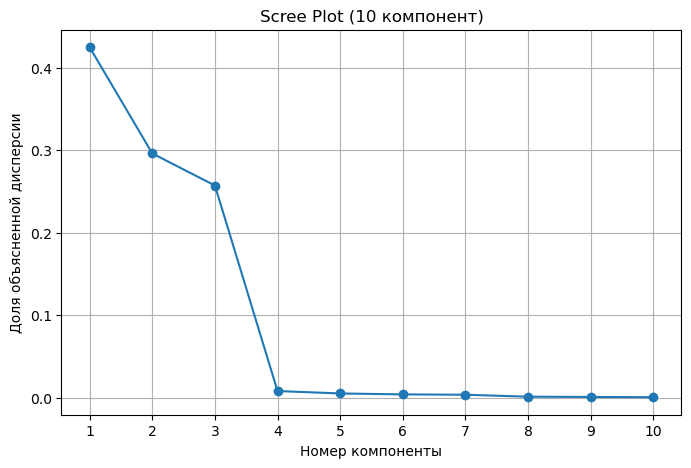

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), explained_variance, marker='o')
plt.title("Scree Plot (10 компонент)")
plt.xlabel("Номер компоненты")
plt.ylabel("Доля объясненной дисперсии")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

И накопленную объясненную дисперсию.

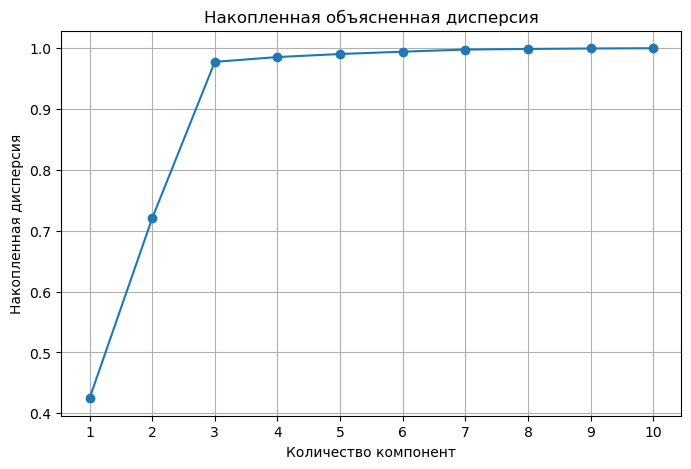

In [10]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), np.cumsum(explained_variance), marker='o')
plt.title("Накопленная объясненная дисперсия")
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная дисперсия")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Выведем собственные значения по каждому компоненту.

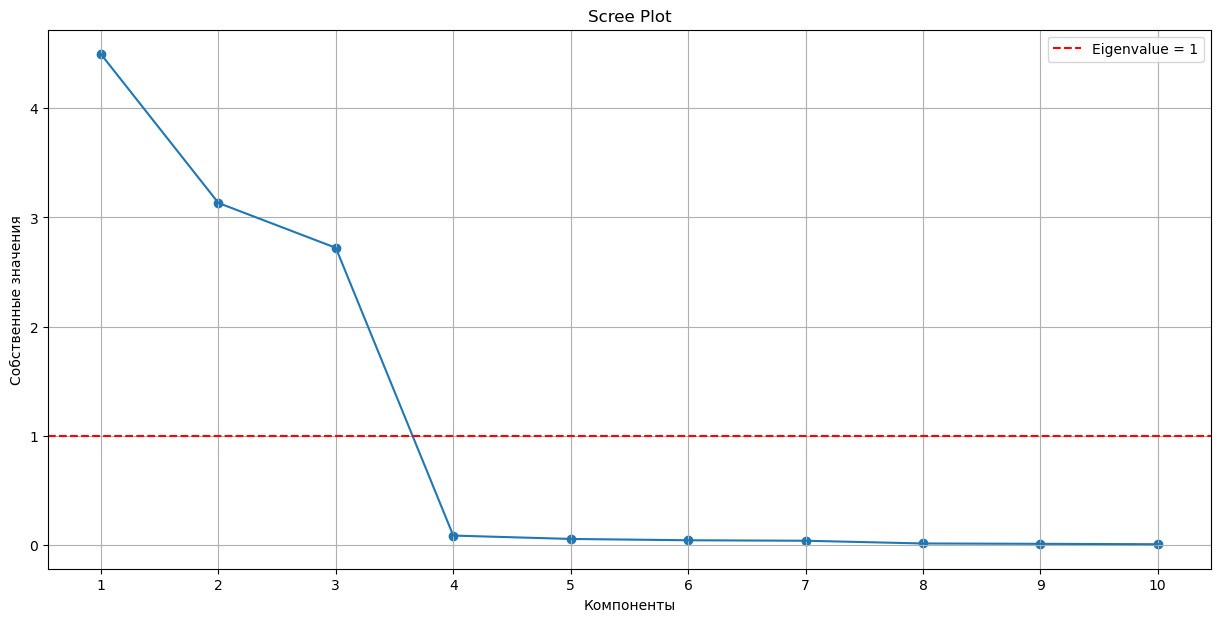

In [11]:
eigenvalues = pca.explained_variance_

plt.figure(figsize=(15, 7))
plt.scatter(range(1, df1.shape[1]+1), eigenvalues)
plt.plot(range(1, df1.shape[1]+1), eigenvalues)
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.title('Scree Plot')
plt.xlabel('Компоненты')
plt.ylabel('Собственные значения')
plt.xticks(range(1, df1.shape[1]+1))
plt.grid(True)
plt.legend()
plt.show()


Первые три компонента имеют собственные значения > 1 и вместе объясняют более 95% дисперсии значений исходных переменных.

Пересчитаем модель для 3 компонентов.

In [12]:
pca = PCA(n_components=3)
pca.fit(X_scaled)

PCA(n_components=3)

In [13]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"{'Компоненты':<12}{'Доля объясненной дисперсии':<28}{'Накопленная дисперсия':<22}")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), start=1):
    print(f"PC{i:<10}{var:<28.4f}{cum_var:<22.4f}")

Компоненты  Доля объясненной дисперсии  Накопленная дисперсия 
PC1         0.4247                      0.4247                
PC2         0.2959                      0.7206                
PC3         0.2570                      0.9776                


Три компонента объясняют 98% вариации значений исходных переменных, мы почти не потеряли информацию об исходных данных после снижения размерности.

Выведем нагрузки по каждой компоненте.

In [14]:
features = ['Память на числа', 'Математические навыки', 'Готовность к прямому диалогу',
            'Умение разрабатывать алгоритмы', 'Уверенность в речи', 'Командный дух',
            'Находчивость', 'Навыки сотрудничества', 'Признание со стороны окружающих',
            'Умение убеждать']

loadings = pd.DataFrame(pca.components_[:3].T,
                        index=features,
                        columns=['PC1', 'PC2', 'PC3'])

# Varimax-ротация
rotator = Rotator(method='varimax')
rotated = rotator.fit_transform(loadings.values)
rotated_df = pd.DataFrame(rotated, index=features, columns=loadings.columns)

# функция для сортировки по выбранной компоненте
def show_rotated(sort_by='PC1', descending=True):
    return rotated_df.reindex(rotated_df[sort_by].abs().sort_values(ascending=not descending).index).round(3)

print("Нагрузки, отсортированные по PC1:\n")
print(show_rotated('PC1'))

Нагрузки, отсортированные по PC1:

                                   PC1    PC2    PC3
Находчивость                     0.505  0.032  0.017
Умение убеждать                  0.503  0.030  0.033
Уверенность в речи               0.498 -0.071 -0.004
Готовность к прямому диалогу     0.493  0.007 -0.044
Память на числа                 -0.029 -0.573  0.034
Умение разрабатывать алгоритмы   0.014 -0.574 -0.015
Математические навыки            0.014 -0.578 -0.017
Командный дух                   -0.006  0.023  0.575
Признание со стороны окружающих  0.005 -0.023  0.578
Навыки сотрудничества           -0.000 -0.002  0.575


Компонент 1 отражает способность влиять на окружающих через общение: уверенно говорить, быстро ориентироваться, убеждать и вступать в прямой диалог. Его можно назвать **"Коммуникативное влияние"**.

In [15]:
print("Нагрузки, отсортированные по PC2:\n")
print(show_rotated('PC2'))

Нагрузки, отсортированные по PC2:

                                   PC1    PC2    PC3
Математические навыки            0.014 -0.578 -0.017
Умение разрабатывать алгоритмы   0.014 -0.574 -0.015
Память на числа                 -0.029 -0.573  0.034
Уверенность в речи               0.498 -0.071 -0.004
Находчивость                     0.505  0.032  0.017
Умение убеждать                  0.503  0.030  0.033
Командный дух                   -0.006  0.023  0.575
Признание со стороны окружающих  0.005 -0.023  0.578
Готовность к прямому диалогу     0.493  0.007 -0.044
Навыки сотрудничества           -0.000 -0.002  0.575


Компонент 2 отражает аналитическое и системное мышление: работу с числами, логикой, структурированием и формализацией задач. Его можно назвать **"Логико-математические способности"**. Негативные нагрузки на математические навыки, алгоритмы и память на числа показывают, что высокие значения этих способностей соответствуют низким значениям компонента, и наоборот. Это нужно обязательно учесть в дальнейшем анализе.

Уточнение: можно было бы назвать компонент **"Меньшая выраженность логико-математических способностей"**, но так обычно не делают. Лучше оставить первое предложенное название и дать пояснение в тексте.

In [16]:
print("Нагрузки, отсортированные по PC3:\n")
print(show_rotated('PC3'))

Нагрузки, отсортированные по PC3:

                                   PC1    PC2    PC3
Признание со стороны окружающих  0.005 -0.023  0.578
Навыки сотрудничества           -0.000 -0.002  0.575
Командный дух                   -0.006  0.023  0.575
Готовность к прямому диалогу     0.493  0.007 -0.044
Память на числа                 -0.029 -0.573  0.034
Умение убеждать                  0.503  0.030  0.033
Математические навыки            0.014 -0.578 -0.017
Находчивость                     0.505  0.032  0.017
Умение разрабатывать алгоритмы   0.014 -0.574 -0.015
Уверенность в речи               0.498 -0.071 -0.004


Компонент 3 отражает включённость человека в группу: принятие другими, умение работать в команде, ориентацию на коллектив. Его можно назвать **"Социальная интеграция"**.

Теперь сохраним компоненты в исходном датафрейме в виде новых признаков.

In [17]:
rotated_loadings = Rotator(method='varimax').fit_transform(pca.components_.T)
rotated_scores = X_scaled @ rotated_loadings

df1[[f'PC{i+1}' for i in range(rotated_scores.shape[1])]] = rotated_scores

df1.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,PC1,PC2,PC3
nr,,,,,,,,,,,,,
1,10,10,9,10,10,10,9,10,10,9,1.587093,-1.914988,1.768784
2,10,10,4,10,5,5,4,5,4,3,-2.216300,-1.922517,-1.431078
3,5,4,10,5,10,4,10,5,3,10,2.130702,1.393161,-1.808369
4,10,10,9,10,10,10,9,10,10,9,1.587093,-1.914988,1.768784
5,4,3,5,4,3,10,4,10,10,5,-2.012071,2.041351,1.764349


Визуализируем компоненты в 3D

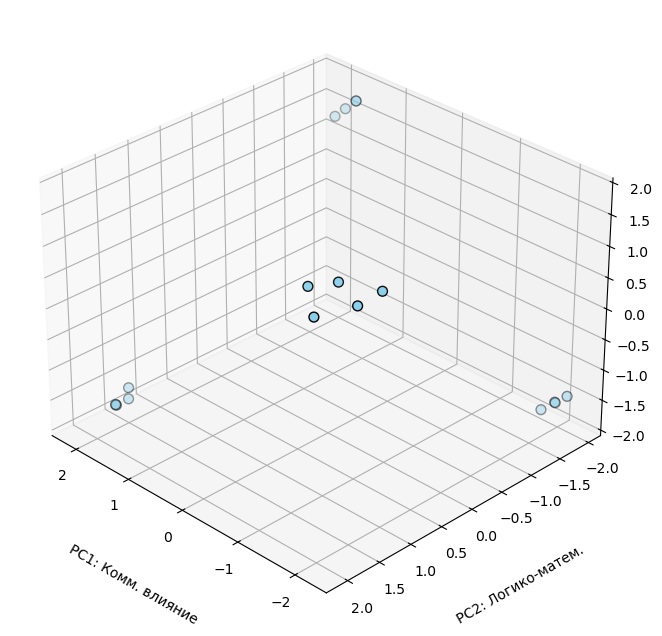

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['PC1'], df1['PC2'], df1['PC3'], c='skyblue', s=50, edgecolor='k')

ax.set_xlabel('PC1: Комм. влияние', labelpad=20)
ax.set_ylabel('PC2: Логико-матем.', labelpad=20)
ax.set_zlabel('PC3: Соц. интеграция', labelpad=40) 

ax.view_init(elev=30, azim=135)  

plt.show()


Явно прослеживается наличие 4-х кластеров.

### Пример 1.2. Данные о сотрудниках <a id="section_1_2"></a>

### [Текучесть кадров и производительность труда](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

[Описание признаков](https://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html)

| Имя признака                   | Описание признака                                     |
|------------------------|------------------------------------------------|
| Age                    | Numerical Value                                 |
| Attrition              | Employee leaving the company (0=no, 1=yes)     |
| BusinessTravel        | (1=No Travel, 2=Travel Frequently, 3=Travel Rarely) |
| DailyRate             | Numerical Value - Salary Level                  |
| Department             | (1=HR, 2=R&D, 3=Sales)                         |
| DistanceFromHome     | Numerical Value - THE DISTANCE FROM WORK TO HOME |
| Education              | Numerical Value                                 |
| EducationField        | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6=TECHNICAL) |
| EmployeeCount         | Numerical Value                                 |
| EmployeeNumber        | Numerical Value - EMPLOYEE ID                   |
| EnvironmentSatisfaction| Numerical Value - SATISFACTION WITH THE ENVIRONMENT |
| Gender                 | (1=FEMALE, 2=MALE)                             |
| HourlyRate| Numerical Value - HOURLY SALARY                 |
| JobInvolvement        | Numerical Value - JOB INVOLVEMENT                |
| JobLevel              | Numerical Value - LEVEL OF JOB                   |
| JobRole               | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5=MANAGING DIRECTOR, 6=RESEARCH DIRECTOR, 7=RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9=SALES REPRESENTATIVE) |
| JobSatisfaction       | Numerical Value - SATISFACTION WITH THE JOB     |
| MaritalStatus         | (1=DIVORCED, 2=MARRIED, 3=SINGLE)               |
| MonthlyIncome         | Numerical Value - MONTHLY SALARY                 |
| MonthlyRate            | Numerical Value - MONTHLY RATE                   |
| NumCompaniesWorked    | Numerical Value - NO. OF COMPANIES WORKED AT    |
| Over18                | (1=YES, 2=NO)                                   |
| OverTime               | (1=NO, 2=YES)                                   |
| PercentSalaryHike    | Numerical Value - PERCENTAGE INCREASE IN SALARY |
| PerformanceRating     | Numerical Value - PERFORMANCE RATING             |
| RelationshipSatisfaction | Numerical Value - RELATIONS SATISFACTION         |
| StandardHours         | Numerical Value - STANDARD HOURS                  |
| StockOptionLevel    | Numerical Value - STOCK OPTIONS                   |
| TotalWorkingYears    | Numerical Value - TOTAL YEARS WORKED              |
| TrainingTimesLastYear| Numerical Value - HOURS SPENT TRAINING           |
| WorkLifeBalance      | Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE |
| YearsAtCompany       | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY |
| YearsInCurrentRole  | Numerical Value - YEARS IN CURRENT ROLE           |
| YearsSinceLastPromotion | Numerical Value - LAST PROMOTION               |
| YearsWithCurrManager  | Numerical Value - YEARS SPENT WITH CURRENT MANAGER |


In [19]:
df2 = pd.read_csv("Employee_Attrition.csv")
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Отберем числовые признаки, на основе которых будем проводить PCA.

In [21]:
df2 = df2[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
           'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [22]:
rho = df2.corr()
pval = df2.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0***,-0.0,0.5***,0.3***,0.0,0.68***,-0.02,0.31***,0.21***,0.22***,0.2***
DistanceFromHome,-0.0,1.0***,-0.02,-0.03,0.04,0.0,-0.04,0.01,0.02,0.01,0.01
MonthlyIncome,0.5***,-0.02,1.0***,0.15***,-0.03,0.77***,-0.02,0.51***,0.36***,0.34***,0.34***
NumCompaniesWorked,0.3***,-0.03,0.15***,1.0***,-0.01,0.24***,-0.07*,-0.12***,-0.09***,-0.04,-0.11***
PercentSalaryHike,0.0,0.04,-0.03,-0.01,1.0***,-0.02,-0.01,-0.04,-0.0,-0.02,-0.01
TotalWorkingYears,0.68***,0.0,0.77***,0.24***,-0.02,1.0***,-0.04,0.63***,0.46***,0.4***,0.46***
TrainingTimesLastYear,-0.02,-0.04,-0.02,-0.07*,-0.01,-0.04,1.0***,0.0,-0.01,-0.0,-0.0
YearsAtCompany,0.31***,0.01,0.51***,-0.12***,-0.04,0.63***,0.0,1.0***,0.76***,0.62***,0.77***
YearsInCurrentRole,0.21***,0.02,0.36***,-0.09***,-0.0,0.46***,-0.01,0.76***,1.0***,0.55***,0.71***
YearsSinceLastPromotion,0.22***,0.01,0.34***,-0.04,-0.02,0.4***,-0.0,0.62***,0.55***,1.0***,0.51***


Между некоторыми переменными наблюдается корреляция выше средней. Попробуем снизить размерность с помощью PCA.

Выполним стандартизацию данных.

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

Выполним PCA на основе 11 компонентов, поскольку у нас 11 исходных переменных.

In [24]:
pca = PCA(n_components=11)
pca.fit(X_scaled)

PCA(n_components=11)

In [25]:
explained_variance = pca.explained_variance_ratio_

Выведем объясненную дисперсию для каждого компонента.

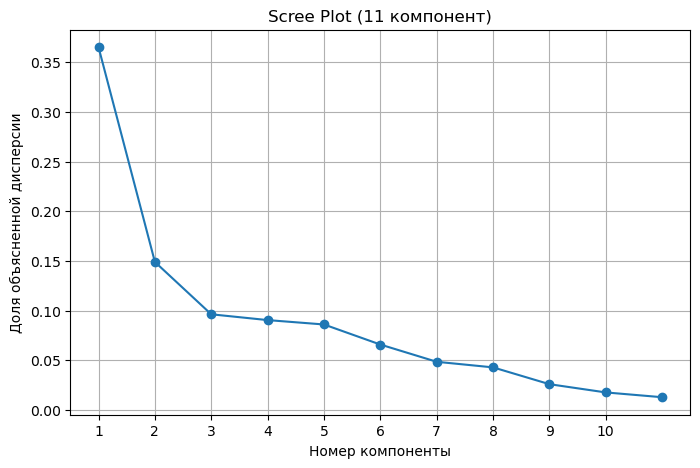

In [26]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 12), explained_variance, marker='o')
plt.title("Scree Plot (11 компонент)")
plt.xlabel("Номер компоненты")
plt.ylabel("Доля объясненной дисперсии")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

И накопленную объясненную дисперсию.

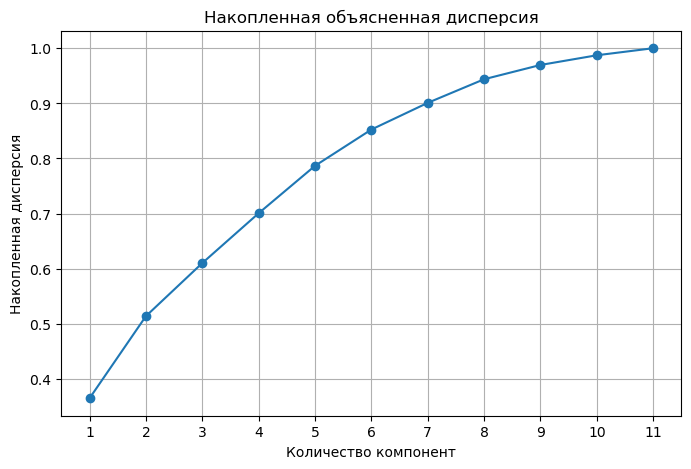

In [27]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 12), np.cumsum(explained_variance), marker='o')
plt.title("Накопленная объясненная дисперсия")
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная дисперсия")
plt.xticks(range(1, 12))
plt.grid()
plt.show()

Выведем собственные значения по каждому компоненту.

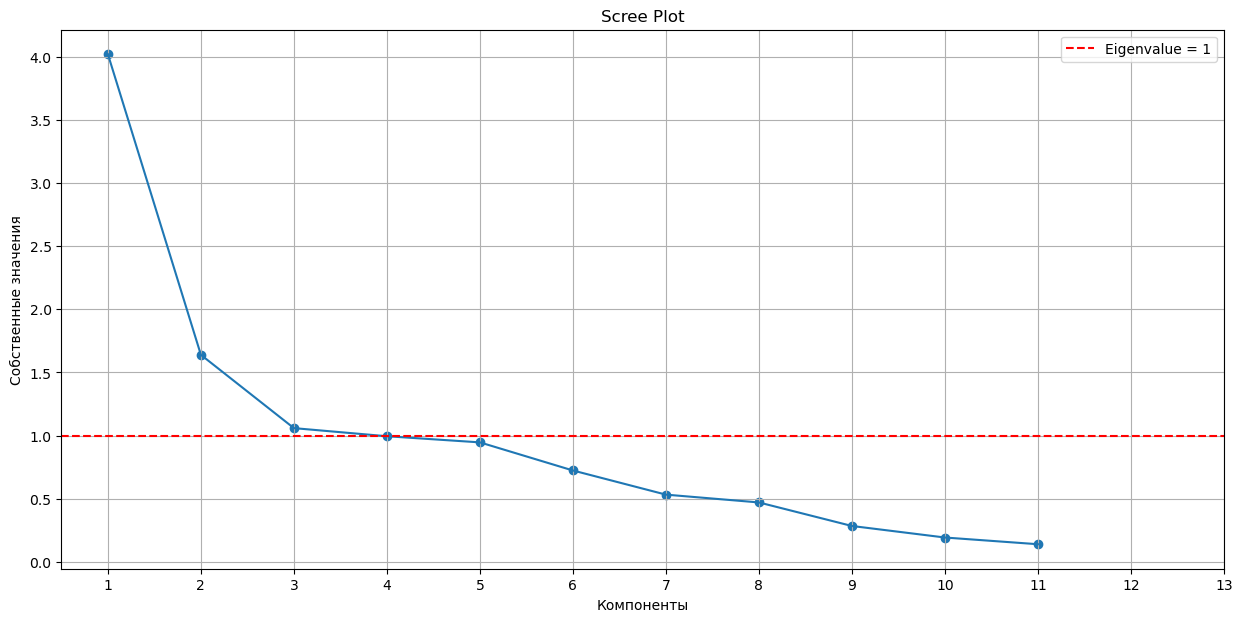

In [28]:
eigenvalues = pca.explained_variance_

plt.figure(figsize=(15, 7))
plt.scatter(range(1, df2.shape[1]+1), eigenvalues)
plt.plot(range(1, df2.shape[1]+1), eigenvalues)
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.title('Scree Plot')
plt.xlabel('Компоненты')
plt.ylabel('Собственные значения')
plt.xticks(range(1, df1.shape[1]+1))
plt.grid(True)
plt.legend()
plt.show()


Первые три компонента имеют собственные значения > 1 и вместе объясняют более половины дисперсии значений исходных переменных.

Пересчитаем модель для 3 компонентов.

In [29]:
pca = PCA(n_components=3)
pca.fit(X_scaled)

PCA(n_components=3)

In [30]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"{'Компоненты':<12}{'Доля объясненной дисперсии':<28}{'Накопленная дисперсия':<22}")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), start=1):
    print(f"PC{i:<10}{var:<28.4f}{cum_var:<22.4f}")

Компоненты  Доля объясненной дисперсии  Накопленная дисперсия 
PC1         0.3651                      0.3651                
PC2         0.1489                      0.5141                
PC3         0.0962                      0.6103                


Три компонента описывают 61% вариации значений исходных переменных. Это приемлемый уровень.

Выведем нагрузки по каждой компоненте.

In [31]:
features = df2.columns

loadings = pd.DataFrame(pca.components_[:3].T,
                        index=features,
                        columns=['PC1', 'PC2', 'PC3'])

# Varimax-ротация
rotator = Rotator(method='varimax')
rotated = rotator.fit_transform(loadings.values)
rotated_df = pd.DataFrame(rotated, index=features, columns=loadings.columns)

# Функция для сортировки по выбранной компоненте
def show_rotated(sort_by='PC1', descending=True):
    return rotated_df.reindex(rotated_df[sort_by].abs().sort_values(ascending=not descending).index).round(3)

print("Нагрузки, отсортированные по PC1:\n")
print(show_rotated('PC1'))

Нагрузки, отсортированные по PC1:

                           PC1    PC2    PC3
YearsWithCurrManager     0.487 -0.019  0.007
YearsAtCompany           0.485  0.082 -0.020
YearsInCurrentRole       0.484 -0.006  0.019
YearsSinceLastPromotion  0.397  0.036 -0.009
NumCompaniesWorked      -0.301  0.479  0.028
TotalWorkingYears        0.154  0.501  0.008
MonthlyIncome            0.125  0.447 -0.030
Age                     -0.046  0.550  0.019
DistanceFromHome         0.044 -0.051  0.686
TrainingTimesLastYear    0.037 -0.073 -0.491
PercentSalaryHike        0.000 -0.025  0.535


Компонент 1 отражает карьерную стабильность и организационную укорененность сотрудника.

Он положительно связан с длительностью работы в компании, в текущей роли и с текущим руководителем, отрицательно — с числом сменённых компаний, а также связан с более длительным периодом без продвижения.

Это указывает на устойчивую, но менее динамичную карьерную траекторию: высокие значения характерны для сотрудников, которые надолго закрепляются в одной организации и роли, формируя стабильные профессиональные отношения, но продвигаются реже. Низкие значения отражают мобильность, смену работодателей и более динамичный карьерный путь.

Этот компонент можно назвать **«Карьерная стабильность»**.

In [32]:
print("Нагрузки, отсортированные по PC2:\n")
print(show_rotated('PC2'))

Нагрузки, отсортированные по PC2:

                           PC1    PC2    PC3
Age                     -0.046  0.550  0.019
TotalWorkingYears        0.154  0.501  0.008
NumCompaniesWorked      -0.301  0.479  0.028
MonthlyIncome            0.125  0.447 -0.030
YearsAtCompany           0.485  0.082 -0.020
TrainingTimesLastYear    0.037 -0.073 -0.491
DistanceFromHome         0.044 -0.051  0.686
YearsSinceLastPromotion  0.397  0.036 -0.009
PercentSalaryHike        0.000 -0.025  0.535
YearsWithCurrManager     0.487 -0.019  0.007
YearsInCurrentRole       0.484 -0.006  0.019


Компонент 2 отражает профессиональный опыт сотрудника, возраст и доход, а также разнообразие его карьерного пути (количество компаний, в которых он работал). Высокие значения характерны для зрелых, опытных сотрудников с широким карьерным опытом; низкие — для молодых специалистов с ограниченным опытом.

Этот компонент можно назвать **«Карьерный опыт и рыночная зрелость»**. 

In [33]:
print("Нагрузки, отсортированные по PC3:\n")
print(show_rotated('PC3'))

Нагрузки, отсортированные по PC3:

                           PC1    PC2    PC3
DistanceFromHome         0.044 -0.051  0.686
PercentSalaryHike        0.000 -0.025  0.535
TrainingTimesLastYear    0.037 -0.073 -0.491
MonthlyIncome            0.125  0.447 -0.030
NumCompaniesWorked      -0.301  0.479  0.028
YearsAtCompany           0.485  0.082 -0.020
YearsInCurrentRole       0.484 -0.006  0.019
Age                     -0.046  0.550  0.019
YearsSinceLastPromotion  0.397  0.036 -0.009
TotalWorkingYears        0.154  0.501  0.008
YearsWithCurrManager     0.487 -0.019  0.007


Компонент 3 положительно связан с расстоянием до работы и размером повышения зарплаты, и отрицательно — с количеством пройденных обучающих программ. Высокие значения компонента характерны для сотрудников, для которых важны материальные стимулы и которые могут быть менее вовлечены в обучение. Низкие значения отражают тех, кто работает ближе к дому и активно использует возможности развития, но получает меньшие зарплатные повышения.

Этот компонент можно назвать **«Материальная мотивация и вовлечённость в обучение»**.

Теперь сохраним компоненты в исходном датафрейме в виде новых признаков.

In [34]:
rotated_loadings = Rotator(method='varimax').fit_transform(pca.components_.T)
rotated_scores = X_scaled @ rotated_loadings

df2[[f'PC{i+1}' for i in range(rotated_scores.shape[1])]] = rotated_scores

df2.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PC1,PC2,PC3
0,41,1,5993,8,11,8,0,6,4,0,5,-1.124941,1.201274,-0.163832
1,49,8,5130,1,23,10,3,10,7,1,7,0.935764,0.139088,0.989256
2,37,2,2090,6,15,7,3,0,0,0,0,-2.587894,-0.109054,-0.656050
3,33,3,2909,1,11,8,3,8,7,3,0,0.021245,-1.018170,-1.222680
4,27,2,3468,9,12,6,3,2,2,2,2,-1.937968,-0.013832,-1.088879


### Пример 1.3. Страхи студентов <a id="section_1_3"></a>

Файл SAQ.xlsx содержит результаты опроса студентов в одном из американских университетов. В нем следующие переменные:

- q01: Статистика заставляет меня плакать
- q02: Мои друзья подумают, что я глупый(ая), если не смогу справиться с Python
- q03: Стандартные отклонения приводят меня в восторг
- q04. Мне снится, что Пирсон нападает на меня с коэффициентами корреляции
- q05: Я не понимаю статистику
- q06: У меня мало опыта работы с компьютерами
- q07: Все компьютеры меня ненавидят
- q08: Я никогда не был(а) хорош(а) в математике
- q09: Мои друзья лучше меня разбираются в статистике
- q010: Компьютеры полезны только для игр
- q011: В школе у меня были плохие оценки по математике
- q012: Люди пытаются убедить, что Python делает статистику более понятной, но это не так
- q013: Я боюсь, что из-за своей некомпетентности в работе с компьютерами нанесу непоправимый ущерб
- q014: У компьютеров есть собственный разум, и они специально ломаются, когда я ими пользуюсь
- q015: Компьютеры настроены против меня
- q016: Я открыто плачу при упоминании центральной тенденции
- q017: Я впадаю в кому каждый раз, когда вижу уравнение
- q018: Python всегда выдает ошибку, когда я пытаюсь что-то проанализировать с его помощью
- q019: Все смотрят на меня, когда я пишу код на Python
- q020: Я не могу спать из-за мыслей о собственных векторах
- q021: Я просыпаюсь под одеялом с мыслью, что застрял(а) внутри нормального распределения
- q022: Мои друзья лучше меня разбираются в Python
- q023: Если я буду хорош(а) в статистике, друзья подумают, что я зануда

**Задание**: с помощью PCA снизьте размерность данных, дайте названия полученным компонентам и объясните выбор названий. 

In [35]:
# здесь написать решение

## t-SNE<a id="chapter2"></a>

### Пример 2.1. Оценка кандидатов<a id="section_2_1"></a>

In [36]:
df1 = pd.read_excel('assess.xlsx')
df1

,nr,name,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,1,Volker R,10,10,9,10,10,10,9,10,10,9
1,2,Sigrid K,10,10,4,10,5,5,4,5,4,3
2,3,Elmar M,5,4,10,5,10,4,10,5,3,10
3,4,Peter B,10,10,9,10,10,10,9,10,10,9
4,5,Otto R,4,3,5,4,3,10,4,10,10,5
5,6,Elke M,10,10,4,10,5,4,3,4,5,5
6,7,Sarah K,4,4,5,5,4,10,5,10,10,6
7,8,Peter T,4,5,3,4,5,10,4,10,10,4
8,9,Gudrun M,4,5,10,4,10,5,10,4,3,10
9,10,Siglinde P,10,10,4,10,5,4,4,5,4,4


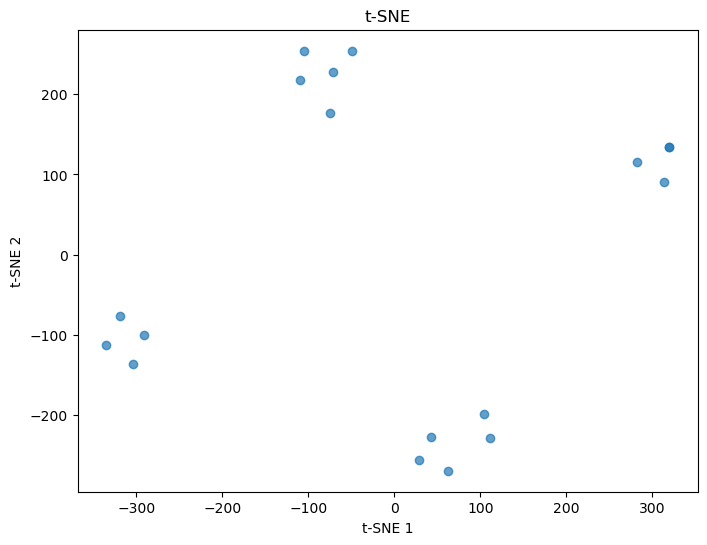

In [37]:
X = StandardScaler().fit_transform(df1.drop(columns=['nr', 'name']))
X_embedded = TSNE(n_components=2, perplexity=3, random_state=42).fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.7)
plt.title("t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

Добавим метки с именами

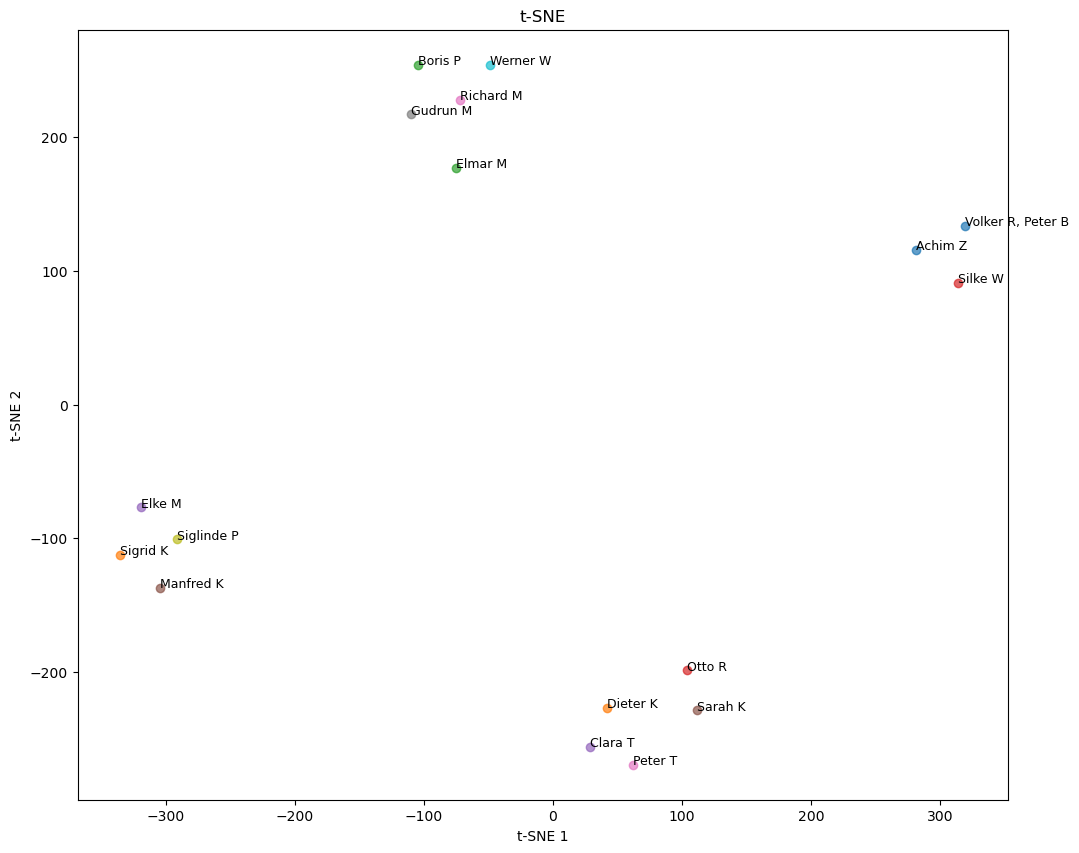

In [38]:
# Создаем DataFrame с координатами
df_tsne = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_tsne['name'] = df1['name']

# Группируем совпадающие точки
grouped = defaultdict(list)
for _, row in df_tsne.iterrows():
    key = (round(row['x'], 3), round(row['y'], 3)) 
    grouped[key].append(row['name'])

# Визуализация
plt.figure(figsize=(12,10))

for (x, y), names in grouped.items():
    plt.scatter(x, y, alpha=0.7)
    plt.text(x+0.02, y+0.02, ", ".join(names), fontsize=9)  # объединяем имена

plt.title("t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


Явно выделяется 4 кластера.

### Пример 2.2. Данные о сотрудниках <a id="section_2_2"></a>

In [39]:
df2 = pd.read_csv("Employee_Attrition.csv")
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [40]:
df2 = df2[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
           'YearsSinceLastPromotion', 'YearsWithCurrManager']]

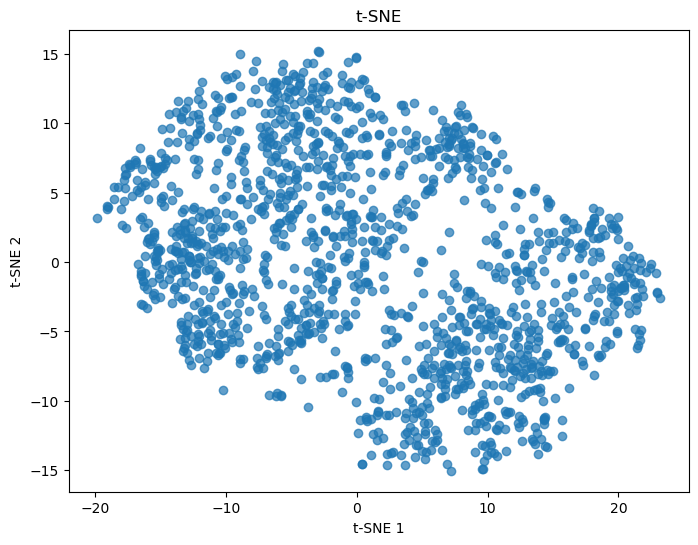

In [41]:
X = StandardScaler().fit_transform(df2)

tsne = TSNE(n_components=2, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.7)
plt.title("t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


Зададим разные значения perplexity для сравнения.

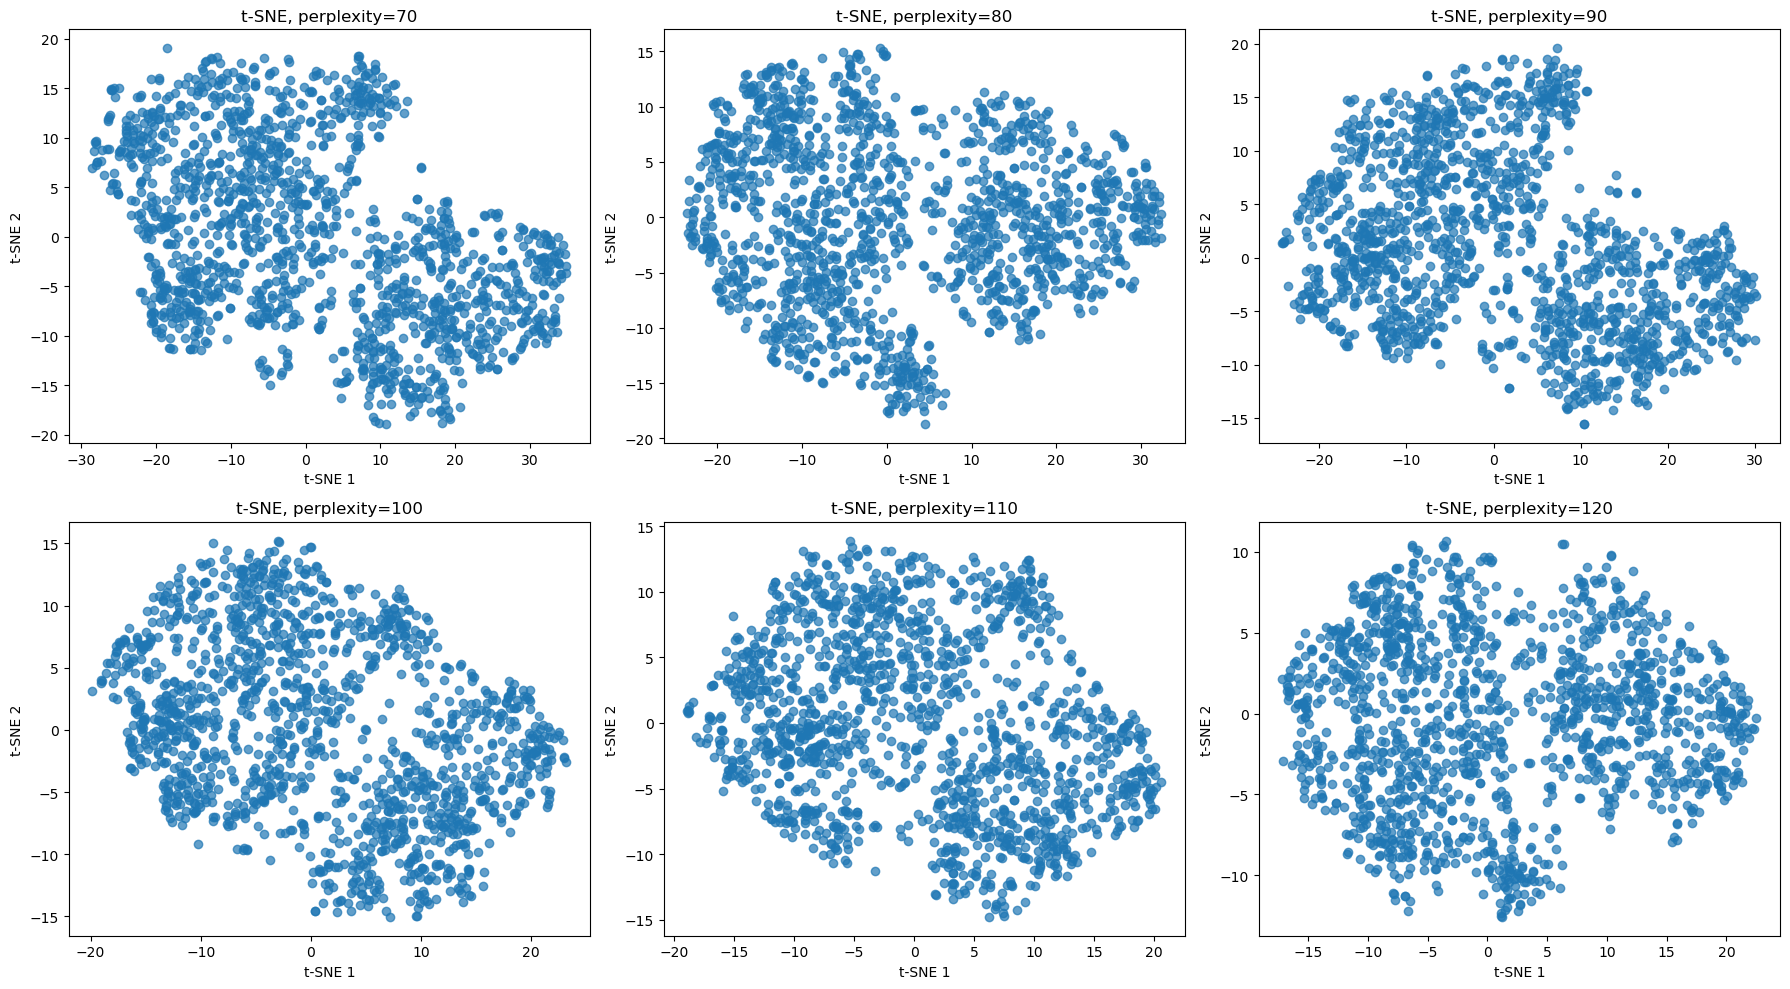

In [42]:
perplexities = [70, 80, 90, 100, 110, 120]

plt.figure(figsize=(18, 10))

for i, perp in enumerate(perplexities, 1):
    tsne = TSNE(n_components=2, perplexity=perp, n_iter=1000, random_state=42)
    X_embedded = tsne.fit_transform(X)
    
    plt.subplot(2, 3, i)
    plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.7)
    plt.title(f"t-SNE, perplexity={perp}")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")

plt.tight_layout()
plt.show()


Кажется, что в данных выделяются 2 кластера. Узнаем точнее, когда проведем кластерный анализ данных.

### Пример 2.3. Страхи студентов <a id="section_2_3"></a>

Файл SAQ.xlsx содержит результаты  опроса студентов в одном из американских университетов. В нем следующие переменные:

- q01: Статистика заставляет меня плакать
- q02: Мои друзья подумают, что я глупый(ая), если не смогу справиться с Python
- q03: Стандартные отклонения приводят меня в восторг
- q04. Мне снится, что Пирсон нападает на меня с коэффициентами корреляции
- q05: Я не понимаю статистику
- q06: У меня мало опыта работы с компьютерами
- q07: Все компьютеры меня ненавидят
- q08: Я никогда не был(а) хорош(а) в математике
- q09: Мои друзья лучше меня разбираются в статистике
- q010: Компьютеры полезны только для игр
- q011: В школе у меня были плохие оценки по математике
- q012: Люди пытаются убедить, что Python делает статистику более понятной, но это не так
- q013: Я боюсь, что из-за своей некомпетентности в работе с компьютерами нанесу непоправимый ущерб
- q014: У компьютеров есть собственный разум, и они специально ломаются, когда я ими пользуюсь
- q015: Компьютеры настроены против меня
- q016: Я открыто плачу при упоминании центральной тенденции
- q017: Я впадаю в кому каждый раз, когда вижу уравнение
- q018: Python всегда выдает ошибку, когда я пытаюсь что-то проанализировать с его помощью
- q019: Все смотрят на меня, когда я пишу код на Python
- q020: Я не могу спать из-за мыслей о собственных векторах
- q021: Я просыпаюсь под одеялом с мыслью, что застрял(а) внутри нормального распределения
- q022: Мои друзья лучше меня разбираются в Python
- q023: Если я буду хорош(а) в статистике, друзья подумают, что я зануда

**Задание**: с помощью t-SNE снизьте размерность данных до 2D и визуализируйте получившуюся структуру, наблюдаются ли в ней кластеры?

In [43]:
# здесь написать решение